In [7]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical
import pickle

In [8]:
def load_rand():
    X=[]
    dir_path='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train'
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for img_name in os.listdir(path_main):
            if i>=6:
                break
            img=cv2.imread(os.path.join(path_main,img_name))
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            X.append(img)
            i+=1
    return X
    

In [9]:
X=load_rand()

100%|██████████| 6/6 [00:00<00:00, 36.72it/s]

rottenapples
rottenoranges
rottenbanana
freshoranges
freshbanana
freshapples


In [10]:
X=np.array(X)
X.shape

(36, 100, 100, 3)

In [11]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['rottenoranges', 'rottenapples', 'freshbanana', 'freshoranges', 'rottenbanana', 'freshapples']
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

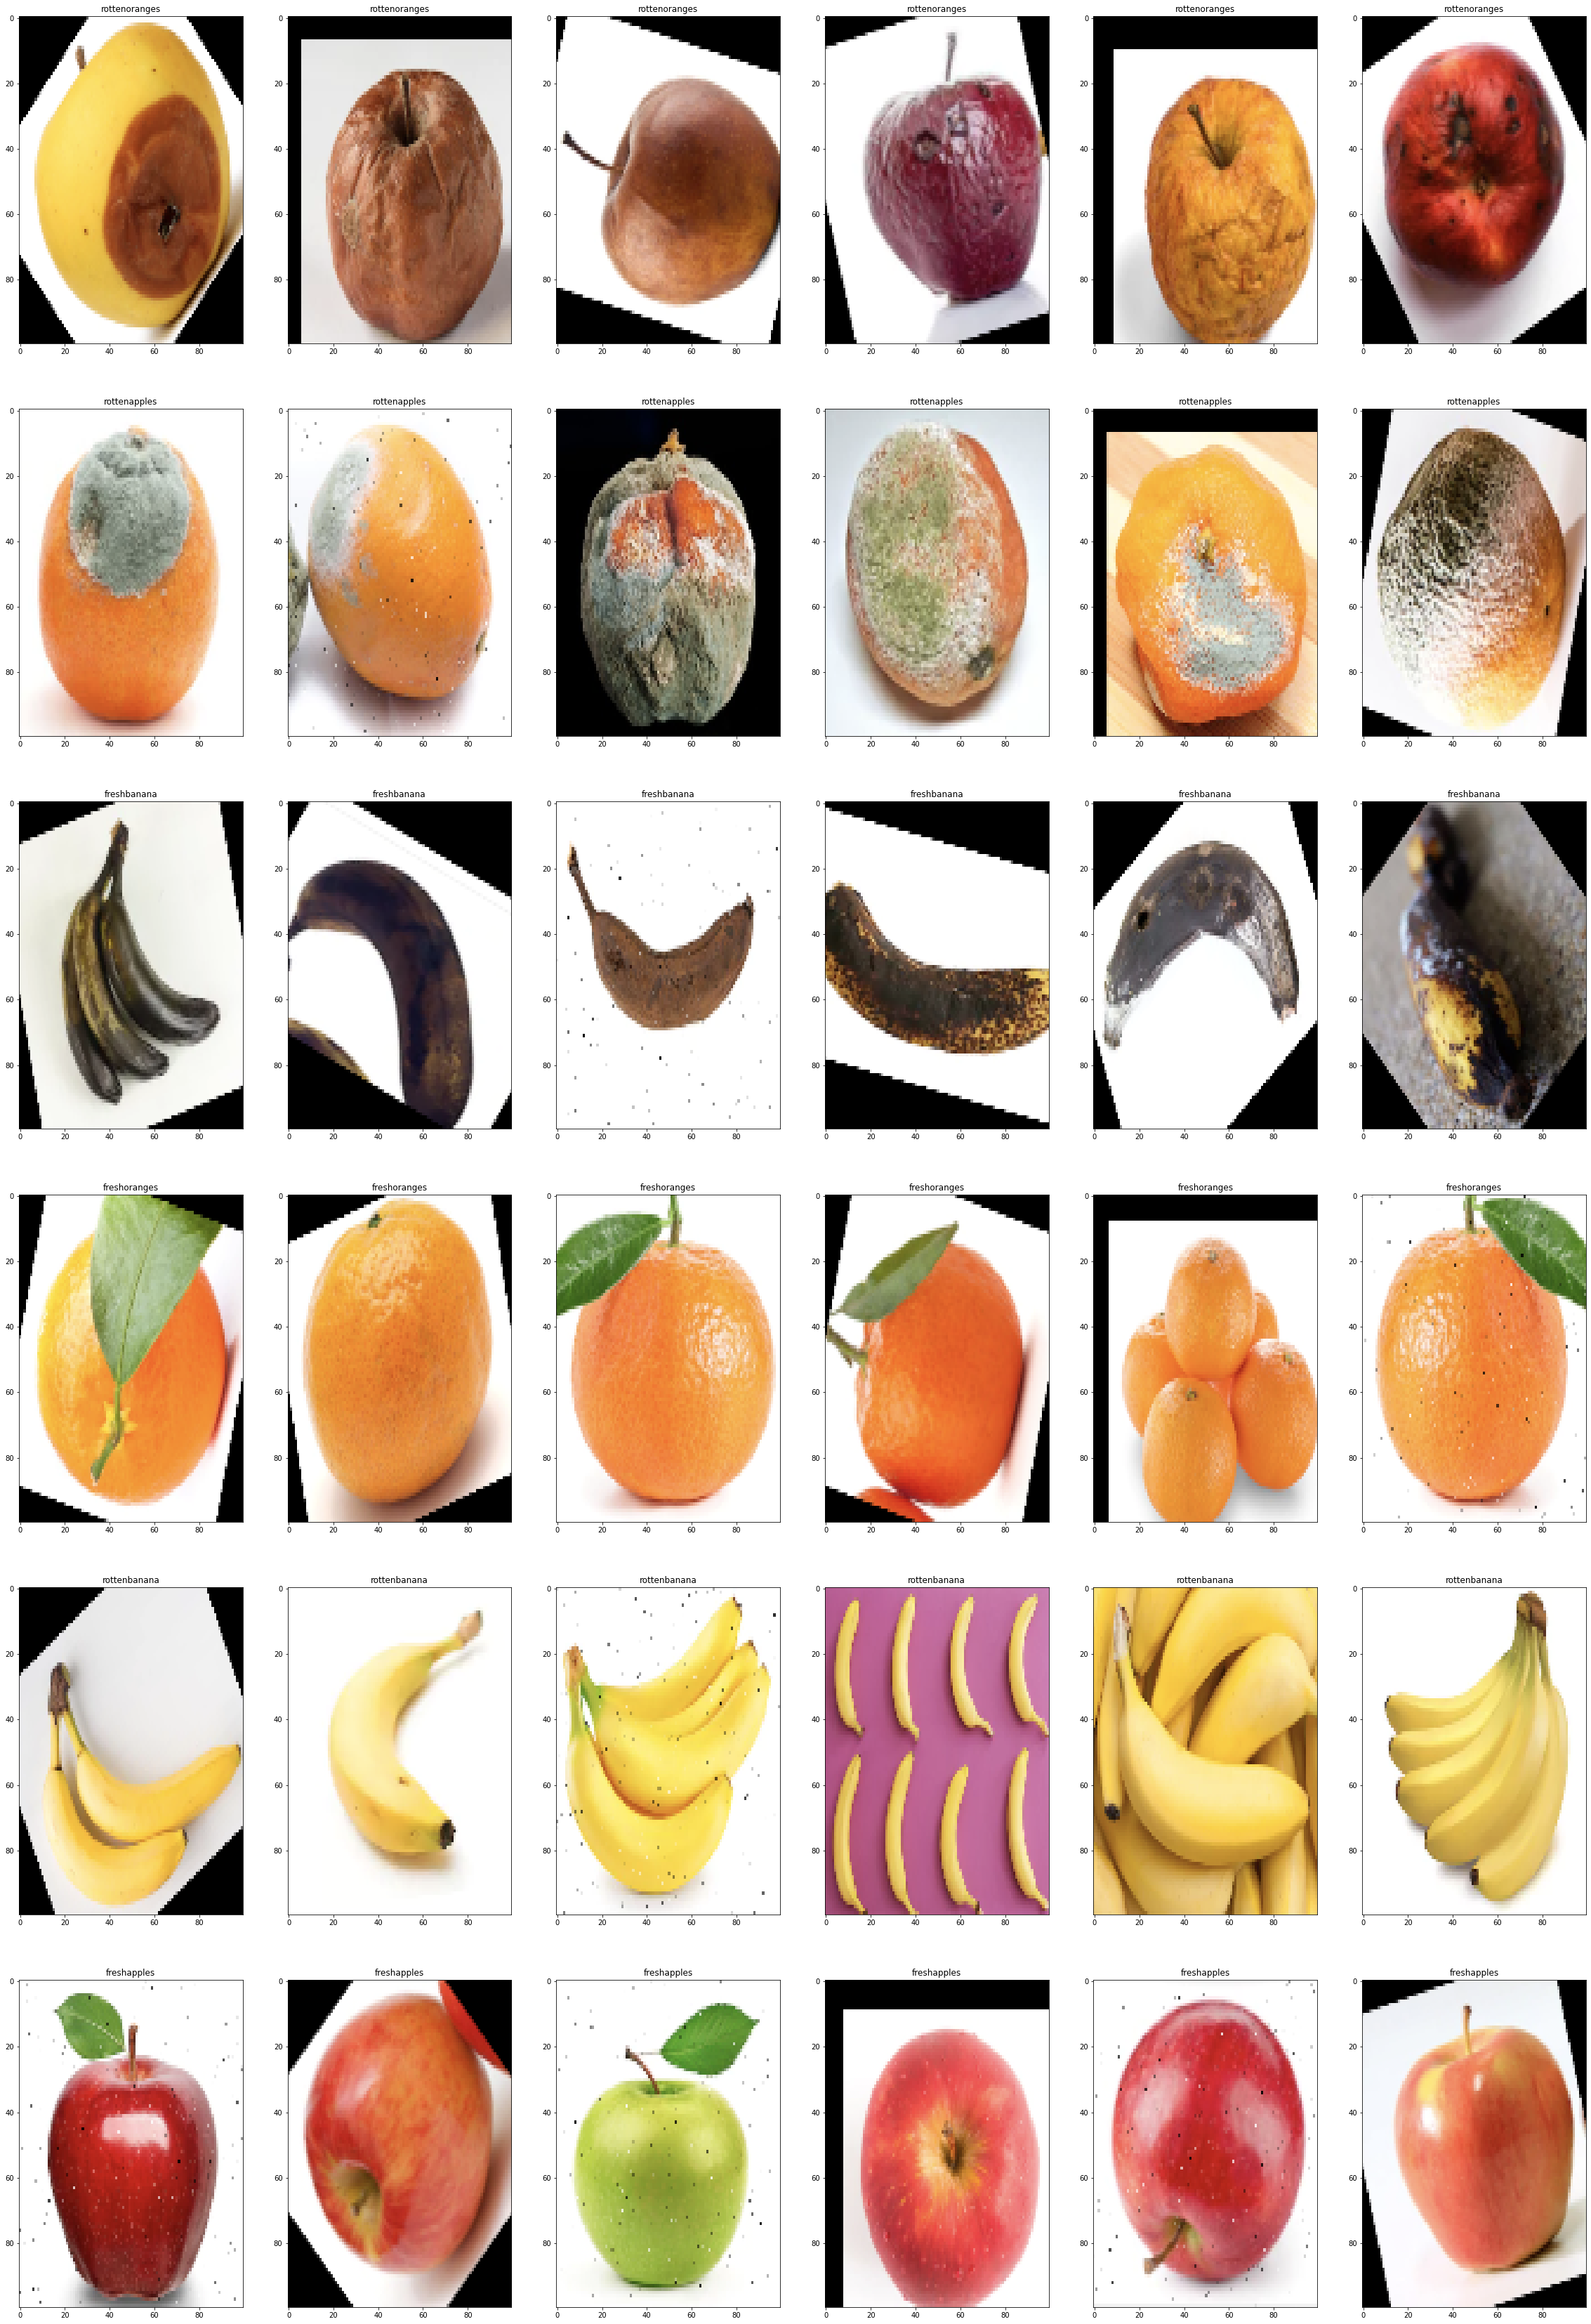

In [12]:
show_subpot(X)

In [13]:
del X

# Rotten vs fresh

In [14]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train')):
        if quality[0] in cata:
            path_main=os.path.join('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [15]:
X,Y=load_rottenvsfresh()

100%|██████████| 10901/10901 [00:00<00:00, 872359.53it/s]

Shuffling your data.....


In [16]:
Y=np.array(Y)
X=np.array(X)

In [17]:
y_ser=pd.Series(Y)
y_ser.value_counts()

1    6161
0    4740
dtype: int64

In [18]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test')):
        if quality[0] in cata:
            path_main=os.path.join('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y            

In [19]:
X_val,Y_val=load_rottenvsfresh_valset()

100%|██████████| 2698/2698 [00:00<00:00, 832626.90it/s]

Shuffling your data.....


In [20]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

1    1534
0    1164
dtype: int64

In [21]:
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential

In [22]:
model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

#model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
separable_conv2d (SeparableC (None, 100, 100, 32)      1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 50, 50, 64)        2

In [24]:
import tensorflow as tf

In [25]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/rotten.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

model.compile(loss=keras.losses.binary_crossentropy, optimizer = keras.optimizers.Adam(lr = 0.001), metrics=['accuracy'])

In [26]:
X=X/255.0
X_val=X_val/255.0

In [27]:
history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_val),epochs= 50,
                 callbacks=[check_point])

Epoch 1/50
546/546 [==============================] - ETA: 0s - loss: 0.3912 - accuracy: 0.8755
Epoch 00001: val_loss improved from inf to 2.03933, saving model to /kaggle/working/rotten.h5
546/546 [==============================] - 29s 53ms/step - loss: 0.3912 - accuracy: 0.8755 - val_loss: 2.0393 - val_accuracy: 0.6557
Epoch 2/50
546/546 [==============================] - ETA: 0s - loss: 0.1863 - accuracy: 0.9315
Epoch 00002: val_loss improved from 2.03933 to 0.23372, saving model to /kaggle/working/rotten.h5
546/546 [==============================] - 28s 51ms/step - loss: 0.1863 - accuracy: 0.9315 - val_loss: 0.2337 - val_accuracy: 0.9359
Epoch 3/50
545/546 [============================>.] - ETA: 0s - loss: 0.1659 - accuracy: 0.9394
Epoch 00003: val_loss improved from 0.23372 to 0.08693, saving model to /kaggle/working/rotten.h5
546/546 [==============================] - 29s 53ms/step - loss: 0.1660 - accuracy: 0.9395 - val_loss: 0.0869 - val_accuracy: 0.9674
Epoch 4/50
546/546 [===

Epoch 29/50
545/546 [============================>.] - ETA: 0s - loss: 0.0537 - accuracy: 0.9852
Epoch 00029: val_loss did not improve from 0.01350
546/546 [==============================] - 28s 52ms/step - loss: 0.0537 - accuracy: 0.9852 - val_loss: 0.2748 - val_accuracy: 0.9073
Epoch 30/50
545/546 [============================>.] - ETA: 0s - loss: 0.0375 - accuracy: 0.9882
Epoch 00030: val_loss improved from 0.01350 to 0.01011, saving model to /kaggle/working/rotten.h5
546/546 [==============================] - 28s 52ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.0101 - val_accuracy: 0.9959
Epoch 31/50
545/546 [============================>.] - ETA: 0s - loss: 0.0187 - accuracy: 0.9938
Epoch 00031: val_loss did not improve from 0.01011
546/546 [==============================] - 27s 50ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0415 - val_accuracy: 0.9878
Epoch 32/50
545/546 [============================>.] - ETA: 0s - loss: 0.0590 - accuracy: 0.9807
Epoch 00032: 

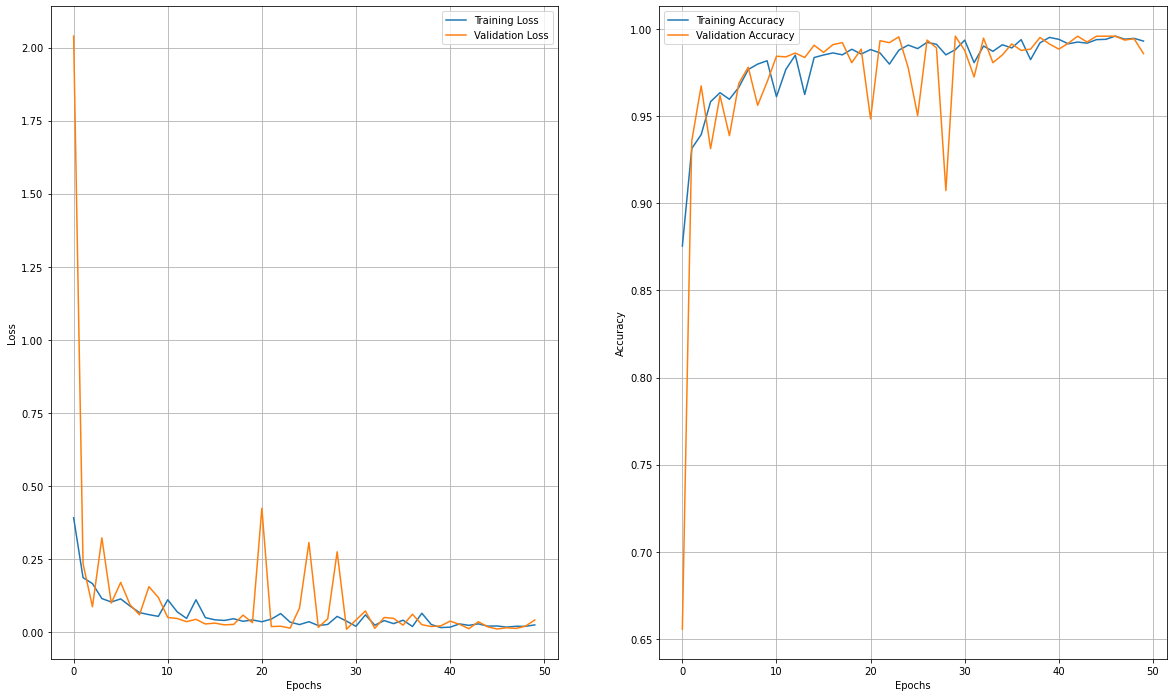

In [28]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [29]:
model.evaluate(X_val,Y_val)

85/85 [==============================] - 1s 8ms/step - loss: 0.0415 - accuracy: 0.9859


[0.04147631675004959, 0.98591548204422]

In [30]:
model.save('/kaggle/working/rottenvsfresh.h5')

In [31]:
from keras.models import Model, load_model

In [32]:
new_model=load_model('/kaggle/working/rotten.h5')

In [33]:
new_model.evaluate(X_val,Y_val)

85/85 [==============================] - 1s 8ms/step - loss: 0.0101 - accuracy: 0.9959


[0.010107725858688354, 0.9959229230880737]

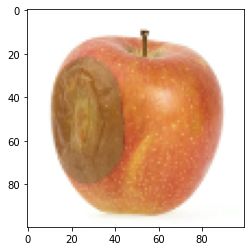

In [34]:
plt.imshow(X_val[0])

In [35]:
model.predict(X_val[0].reshape(1,100,100,3))

array([[0.9997502]], dtype=float32)

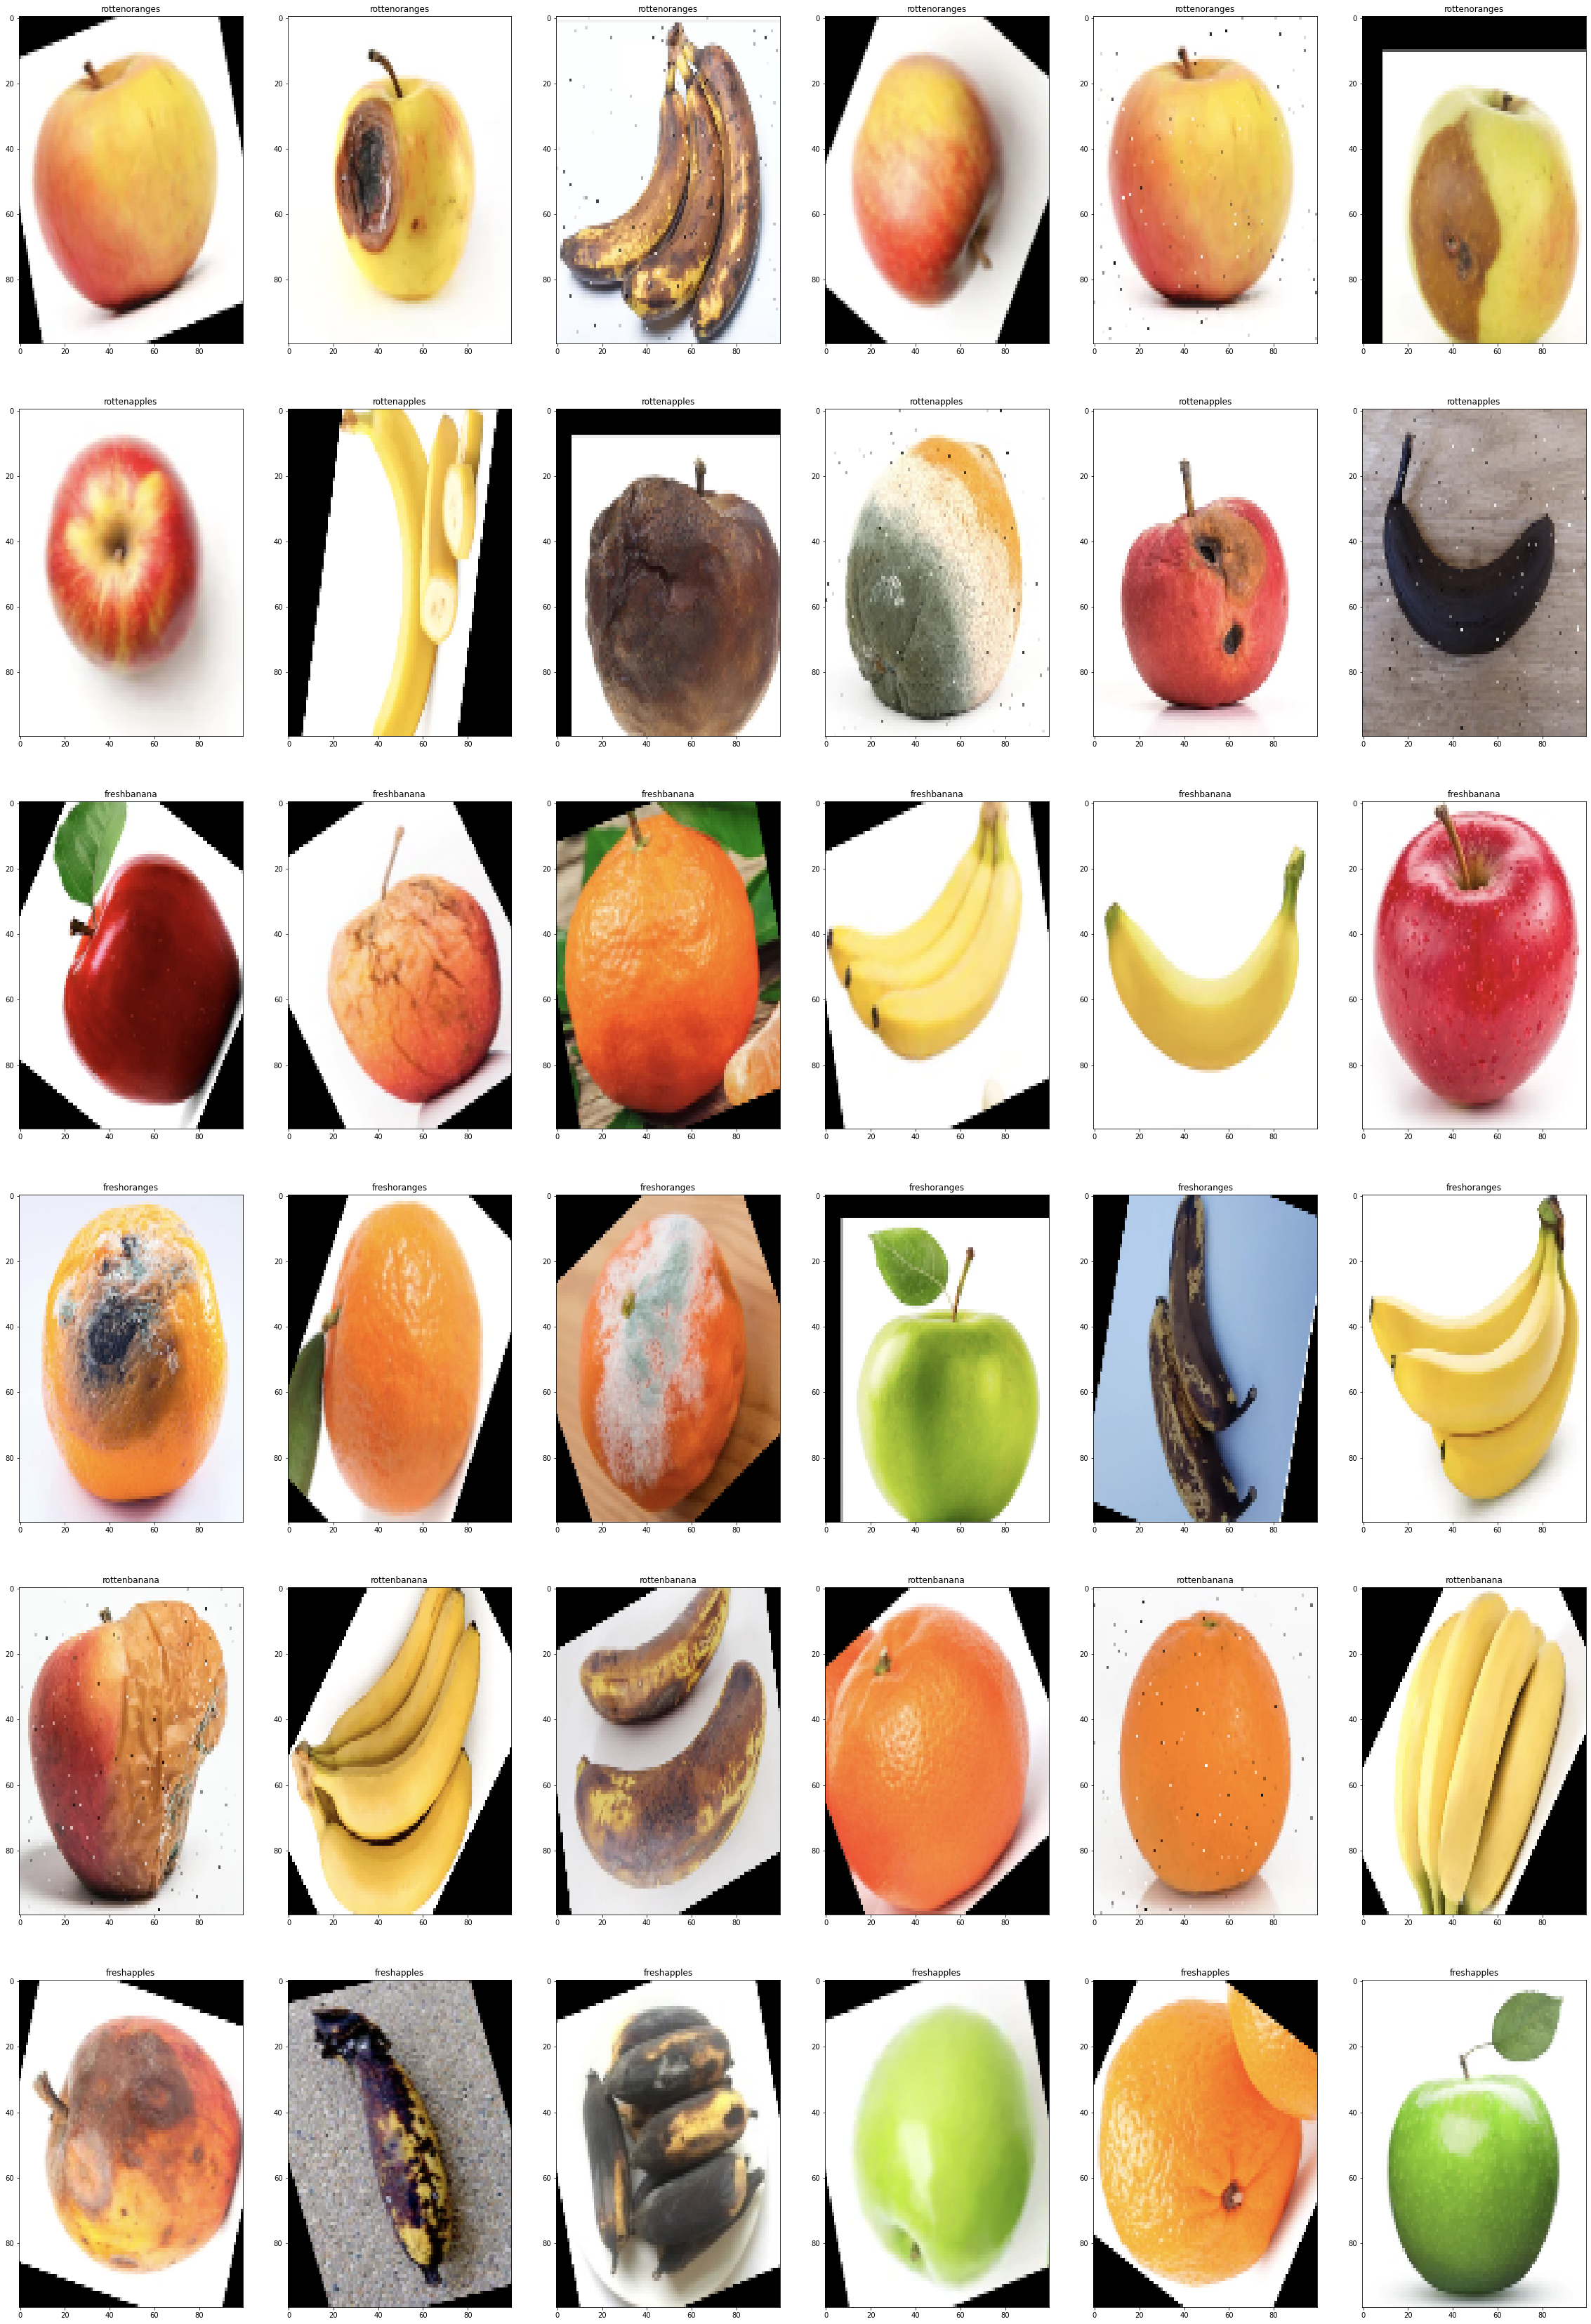

In [36]:
show_subpot(X_val[-36*11:-36*10])

In [37]:
model.predict_classes(X_val[-36*11:-36*10])

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

# Category of Fruits

In [38]:
def load_fruits_data():
    quality=['apples', 'banana','oranges']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test')):
        if quality[0] in cata:
            path_main=os.path.join('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        elif quality[1] in cata:
            path_main=os.path.join('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
        elif quality[2] in cata:
            path_main=os.path.join('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2])
        
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y 
    

In [39]:
def load_fruits_train_data():
    quality=['apples', 'banana','oranges']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train')):
        if quality[0] in cata:
            path_main=os.path.join('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        elif quality[1] in cata:
            path_main=os.path.join('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
        elif quality[2] in cata:
            path_main=os.path.join('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2])
        
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y 
    

In [40]:
X_val,Y_val=load_fruits_data()

100%|██████████| 2698/2698 [00:00<00:00, 683512.45it/s]

Shuffling your data.....


In [41]:
X,Y=load_fruits_train_data()

100%|██████████| 10901/10901 [00:00<00:00, 939566.16it/s]

Shuffling your data.....


In [42]:
X=np.array(X)
X_val=np.array(X_val)

In [43]:
X.shape,X_val.shape

((10901, 100, 100, 3), (2698, 100, 100, 3))

In [44]:
X=X/255.0
X_val=X_val/255.0

In [45]:
Y=to_categorical(Y)
Y

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [46]:
Y_test=to_categorical(Y_val)
Y_val=np.array(Y_val)

In [47]:
Y.shape,Y_test.shape, Y_val.shape

((10901, 3), (2698, 3), (2698,))

In [48]:
model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(SeparableConv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

#model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(3, activation='softmax'))

In [49]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/fruit_cata.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(lr = 0.001), metrics=['accuracy'])

In [51]:
history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_test),epochs= 40,
                 callbacks=[check_point])

Epoch 1/40
545/546 [============================>.] - ETA: 0s - loss: 0.2739 - accuracy: 0.9025
Epoch 00001: val_loss improved from inf to 1.09397, saving model to /kaggle/working/fruit_cata.h5
546/546 [==============================] - 33s 60ms/step - loss: 0.2739 - accuracy: 0.9025 - val_loss: 1.0940 - val_accuracy: 0.3940
Epoch 2/40
545/546 [============================>.] - ETA: 0s - loss: 0.1969 - accuracy: 0.9291
Epoch 00002: val_loss improved from 1.09397 to 0.16697, saving model to /kaggle/working/fruit_cata.h5
546/546 [==============================] - 33s 60ms/step - loss: 0.1968 - accuracy: 0.9291 - val_loss: 0.1670 - val_accuracy: 0.9463
Epoch 3/40
545/546 [============================>.] - ETA: 0s - loss: 0.1601 - accuracy: 0.9422
Epoch 00003: val_loss did not improve from 0.16697
546/546 [==============================] - 33s 60ms/step - loss: 0.1601 - accuracy: 0.9422 - val_loss: 0.2220 - val_accuracy: 0.9307
Epoch 4/40
545/546 [============================>.] - ETA: 0s 

Epoch 29/40
545/546 [============================>.] - ETA: 0s - loss: 0.0482 - accuracy: 0.9859
Epoch 00029: val_loss improved from 0.01956 to 0.01844, saving model to /kaggle/working/fruit_cata.h5
546/546 [==============================] - 32s 59ms/step - loss: 0.0481 - accuracy: 0.9859 - val_loss: 0.0184 - val_accuracy: 0.9930
Epoch 30/40
545/546 [============================>.] - ETA: 0s - loss: 0.0464 - accuracy: 0.9861
Epoch 00030: val_loss did not improve from 0.01844
546/546 [==============================] - 33s 60ms/step - loss: 0.0464 - accuracy: 0.9861 - val_loss: 0.1315 - val_accuracy: 0.9603
Epoch 31/40
545/546 [============================>.] - ETA: 0s - loss: 0.0567 - accuracy: 0.9830
Epoch 00031: val_loss did not improve from 0.01844
546/546 [==============================] - 32s 59ms/step - loss: 0.0567 - accuracy: 0.9830 - val_loss: 0.0509 - val_accuracy: 0.9822
Epoch 32/40
545/546 [============================>.] - ETA: 0s - loss: 0.0557 - accuracy: 0.9837
Epoch 000

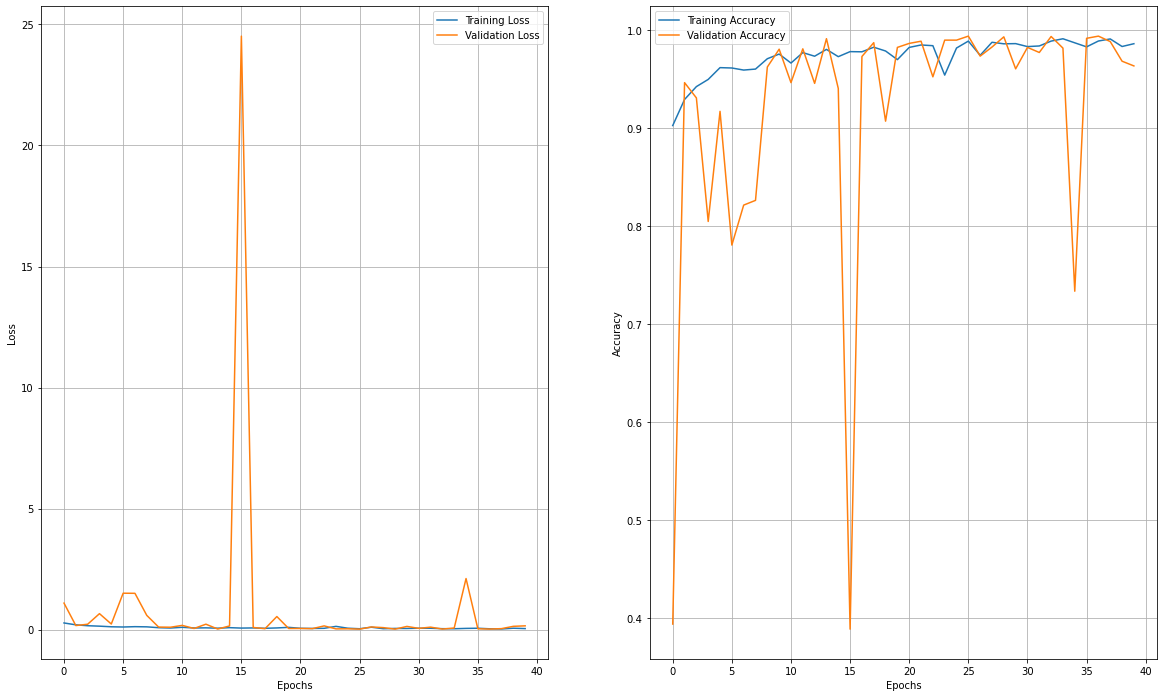

In [52]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [53]:
model=load_model('fruit_cata.h5')

In [54]:
model.evaluate(X,Y)

341/341 [==============================] - 3s 9ms/step - loss: 0.0103 - accuracy: 0.9960


[0.010258167050778866, 0.9959636926651001]

In [ ]:
show_subpot(X_val[:36],title=True,Y=model.predict_classes(X_val[:36]))

In [ ]:
model.predict_classes(X_val[:36])